# Web Extension for Online Sentiment Detection
## Andrew Burton, Kyle West, Aneel Parmar
### Computer Science 571 - Winter 2024
#### Design and implementation of Database Systems
Welcome to our project notebook! In this space, we present a comprehensive overview of our web extension tailored for online sentiment detection. Developed as part of our coursework for Computer Science 571 during the Winter 2024 term, this project encapsulates the intricate design and training of our sentiment detection model.

This notebook primarily focuses on the fine-tuning and model training of various BERT (Bidirectional Encoder Representations from Transformers) models on the GoEmotions dataset. Our objective? Multilabel sequence classification—a task crucial for discerning nuanced sentiments within online content. Here, we delve into the intricacies of our methodology, shedding light on the process behind training these models to accurately classify sentiment across a spectrum of emotions. Join us as we explore the fascinating realm of sentiment analysis in the digital age.








# Setup
Before delving into the intricacies of our sentiment detection model, it's crucial to set up the necessary environment and prepare our data for training and evaluation. Follow the steps below to seamlessly replicate our setup:

## 1. Install Required Packages
Ensure you have the required Python packages installed. You can do this easily using `pip`:

In [ ]:
!pip install -U accelerate
!pip install -U transformers
!pip install -U datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 3.8/8.8 MB 1.2 MB/s eta 0:00:05

## 2. Define Constants
Define any necessary constants such as file paths, model configurations, and hyperparameters. These constants will streamline your workflow and ensure consistency throughout the project.

In [27]:
CHECKPOINTS = [
    'albert-base-v2',
    'roberta-base',
    'distilbert-base-uncased',
    'google/mobilebert-uncased',
    'microsoft/deberta-v3-base'
]
SEED = 42
BATCH_SIZE = 32
SAMPLE_LENGTH = 256
DATASET = 'go_emotions'
ID_OFFSET = 2

## 3. Load the Dataset
Load the dataset into your environment. This could involve reading data from files, connecting to a database, or downloading from an online repository. Ensure that the dataset is properly formatted and compatible with your chosen machine learning framework.

In [29]:
import pandas as pd
from datasets import load_dataset
from sklearn.preprocessing import MultiLabelBinarizer

dataset = load_dataset('go_emotions')
labels = dataset['train'].features['labels'].feature.names

train = pd.DataFrame(dataset['train'], columns=['text', 'labels'])
test = pd.DataFrame(dataset['test'], columns=['text', 'labels'])
valid = pd.DataFrame(dataset['validation'], columns=['text', 'labels'])

mlb = MultiLabelBinarizer()

train_labels = mlb.fit_transform(train['labels']).astype(float)
train_labels = pd.DataFrame(train_labels, columns=mlb.classes_)

train_labels.style.set_caption('Train Labels')
display(train_labels)
display(train['text'].to_list()[:5])

test_labels = mlb.fit_transform(test['labels']).astype(float)
test_labels = pd.DataFrame(test_labels, columns=mlb.classes_)

test_labels.style.set_caption('Test Labels')
display(test_labels)
display(test['text'].to_list()[:5])

valid_labels = mlb.fit_transform(valid['labels']).astype(float)
valid_labels = pd.DataFrame(valid_labels, columns=mlb.classes_)

valid_labels.style.set_caption('Validation Labels')
display(valid_labels)
display(valid['text'].to_list()[:5])

train = pd.concat([train, train_labels], axis=1)
test = pd.concat([test, test_labels], axis=1)
valid = pd.concat([valid, valid_labels], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43406,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43407,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


["My favourite food is anything I didn't have to cook myself.",
 'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead',
 'WHY THE FUCK IS BAYLESS ISOING',
 'To make her feel threatened',
 'Dirty Southern Wankers']

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5423,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


['I’m really sorry about your situation :( Although I love the names Sapphira, Cirilla, and Scarlett!',
 "It's wonderful because it's awful. At not with.",
 'Kings fan here, good luck to you guys! Will be an interesting game to watch! ',
 "I didn't know that, thank you for teaching me something today!",
 'They got bored from haunting earth for thousands of years and ultimately moved on to the afterlife.']

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5424,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


['Is this in New Orleans?? I really feel like this is New Orleans.',
 'You know the answer man, you are programmed to capture those codes they send you, don’t avoid them!',
 "I've never been this sad in my life!",
 'The economy is heavily controlled and subsidized by the government. In any case, I was poking at the lack of nuance in US politics today',
 'He could have easily taken a real camera from a legitimate source and change the price in Word/Photoshop and then print it out.']

## 4. Explore the Data
It is helpful to explore any class imbalance in our data set before we go too far, since any significant class imbalance may not yield very performant reulsts for certain test classes.

### Show Data Samples

In [30]:
display(train.head())
display(test.head())
display(valid.head())

,text,labels,0,1,2,3,4,5,6,7,...,18,19,20,21,22,23,24,25,26,27
0,My favourite food is anything I didn't have to...,[27],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,"Now if he does off himself, everyone will thin...",[27],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,WHY THE FUCK IS BAYLESS ISOING,[2],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,To make her feel threatened,[14],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Dirty Southern Wankers,[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,text,labels,0,1,2,3,4,5,6,7,...,18,19,20,21,22,23,24,25,26,27
0,I’m really sorry about your situation :( Altho...,[25],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,It's wonderful because it's awful. At not with.,[0],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Kings fan here, good luck to you guys! Will be...",[13],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"I didn't know that, thank you for teaching me ...",[15],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,They got bored from haunting earth for thousan...,[27],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,text,labels,0,1,2,3,4,5,6,7,...,18,19,20,21,22,23,24,25,26,27
0,Is this in New Orleans?? I really feel like th...,[27],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,"You know the answer man, you are programmed to...","[4, 27]",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,I've never been this sad in my life!,[25],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,The economy is heavily controlled and subsidiz...,"[4, 27]",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,He could have easily taken a real camera from ...,[20],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Show Class Distribution

<Axes: ylabel='Frequency'>

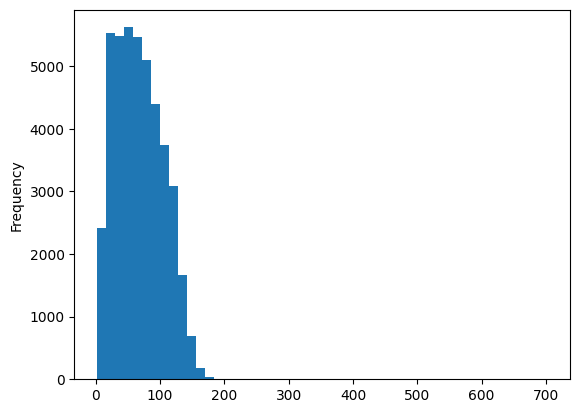

In [31]:
text_lengths = train['text'].str.len()
text_lengths.plot.hist(bins=50)

In [32]:
class_counts = [ c for cls in train['labels'] for c in cls]
class_counts_series = pd.Series(class_counts).value_counts()
sorted_cls_df = pd.DataFrame(class_counts_series, columns=['class_count']).sort_index()
display(sorted_cls_df)

,class_count
0,4130
1,2328
2,1567
3,2470
4,2939
5,1087
6,1368
7,2191
8,641
9,1269


<Axes: ylabel='Frequency'>

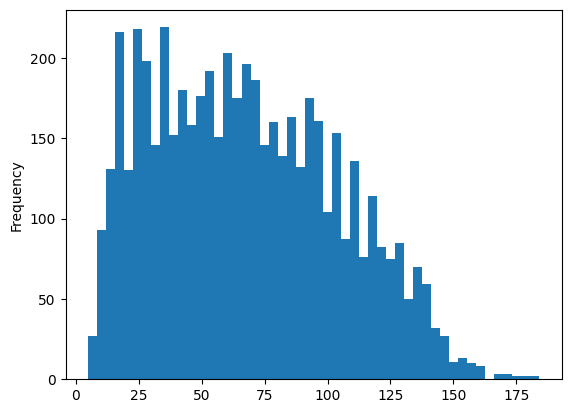

In [33]:
text_lengths = test['text'].str.len()
text_lengths.plot.hist(bins=50)

In [34]:
class_counts = [ c for cls in test['labels'] for c in cls]
class_counts_series = pd.Series(class_counts).value_counts()
sorted_cls_df = pd.DataFrame(class_counts_series, columns=['class_count']).sort_index()
display(sorted_cls_df)

,class_count
0,504
1,264
2,198
3,320
4,351
5,135
6,153
7,284
8,83
9,151


<Axes: ylabel='Frequency'>

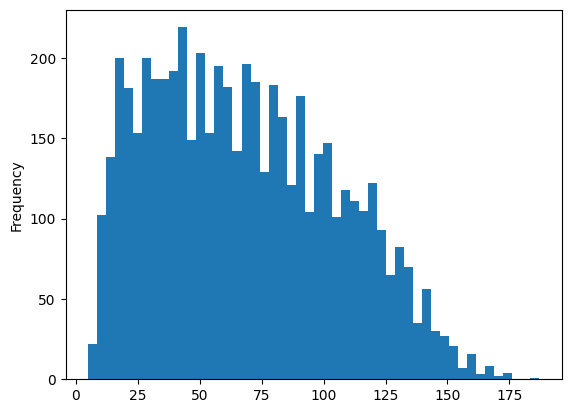

In [35]:
text_lengths = valid['text'].str.len()
text_lengths.plot.hist(bins=50)

In [36]:
class_counts = [ c for cls in valid['labels'] for c in cls]
class_counts_series = pd.Series(class_counts).value_counts()
sorted_cls_df = pd.DataFrame(class_counts_series, columns=['class_count']).sort_index()
display(sorted_cls_df)

,class_count
0,488
1,303
2,195
3,303
4,397
5,153
6,152
7,248
8,77
9,163


## 5. Define A Label Mapping
Map the labels from the dataset into a `label2id` and `id2label` map that can be used by our model to classify our samples.

In [37]:
id2label = {k: v for k, v in enumerate(labels)}
id2label_df = pd.DataFrame(id2label.items(), columns=['id', 'label'])
display(id2label_df)

,id,label
0,0,admiration
1,1,amusement
2,2,anger
3,3,annoyance
4,4,approval
5,5,caring
6,6,confusion
7,7,curiosity
8,8,desire
9,9,disappointment


In [38]:
label2id = {v: k for k, v in id2label.items()}
label2id_df = pd.DataFrame(label2id.items(), columns=['label', 'id'])
display(label2id_df)

,label,id
0,admiration,0
1,amusement,1
2,anger,2
3,annoyance,3
4,approval,4
5,caring,5
6,confusion,6
7,curiosity,7
8,desire,8
9,disappointment,9


## 6. Define A Custom Dataset Class
If the dataset requires custom preprocessing or handling, define a custom dataset class. This class should inherit from the appropriate dataset class provided by your machine learning framework (e.g., PyTorch's `Dataset` class).

In [39]:
import torch
from torch.utils.data import Dataset

class GoEmotionDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=256):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_len, return_tensors='pt')

    ids = encoding['input_ids'].flatten()
    mask = encoding['attention_mask'].flatten()

    return {
        'input_ids': ids,
        'attention_mask': mask,
        'labels': label.clone().detach()
    }

# Stage 2

## 1. Tokenize the Data Splits
To prepare our text data for modeling, we employ a tokenizer to convert raw text into numerical representations suitable for input into our neural network model. We utilize the tokenizer provided by the Transformers library, tailored specifically for the BERT model architecture. This tokenizer efficiently handles tokenization, padding, and special token insertion, ensuring seamless integration with our sentiment detection pipeline.


In [40]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(CHECKPOINTS[2])

train_dataset = GoEmotionDataset(train['text'].tolist(), train_labels.values, tokenizer, SAMPLE_LENGTH)
test_dataset = GoEmotionDataset(test['text'].tolist(), test_labels.values, tokenizer, SAMPLE_LENGTH)
valid_dataset = GoEmotionDataset(valid['text'].tolist(), valid_labels.values, tokenizer, SAMPLE_LENGTH)

## 2. Define the Model
Our sentiment detection model is based on the BERT (Bidirectional Encoder Representations from Transformers) architecture—a powerful transformer-based model renowned for its effectiveness in natural language understanding tasks. Leveraging the Hugging Face Transformers library, we instantiate a BERT model fine-tuned for multilabel sequence classification. This model architecture comprises multiple transformer layers, enabling it to capture intricate semantic relationships within textual data, thereby facilitating accurate sentiment classification across a diverse range of emotions.


In [41]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(CHECKPOINTS[2], num_labels=len(labels), problem_type='multi_label_classification', id2label=id2label, label2id=label2id)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 3. Establish Label Metrics For Performance Evaluation
In multilabel sequence classification, traditional evaluation metrics may not suffice. Therefore, we utilize specialized label-based metrics to assess the performance of our sentiment detection model. These metrics include precision, recall, F1-score, and Hamming loss, providing insights into the model's ability to correctly identify individual sentiment labels across the dataset.


In [42]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from transformers import EvalPrediction
import torch

def multi_label_metrics(predictions, labels, threshold=0.5):
    sigmoid = torch.nn.Sigmoid()
    preds = sigmoid(torch.tensor(predictions))

    y_pred = np.zeros(preds.shape)
    y_pred[np.where(preds >= threshold)] = 1

    y_true = labels
    f1_micro = f1_score(y_true, y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average='micro')
    accuracy = accuracy_score(y_true, y_pred)

    metrics = {
        'f1': f1_micro,
        'roc_auc': roc_auc,
        'accuracy': accuracy
    }

    # Get per labrel report
    label_df = {}
    for label_idx, label_name in id2label.items():
        label_metrics = calc_label_metrics(label_name, y_true[:, label_idx], y_pred[:, label_idx], threshold)
        label_df[label_name] = label_metrics
    df = pd.DataFrame(label_df).T
    df.style.set_caption('Metrics By Class')
    display(pd.DataFrame(label_df).T)

    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    result = multi_label_metrics(preds, p.label_ids)
    return result

def calc_label_metrics(label, y_targets, y_preds, threshold=0.5):
    return {
        'label': label,
        'accuracy': accuracy_score(y_targets, y_preds),
        'precision': precision_score(y_targets, y_preds, zero_division=0),
        'recall': recall_score(y_targets, y_preds, zero_division=0),
        'f1': f1_score(y_targets, y_preds, zero_division=0),
        'mcc': matthews_corrcoef(y_targets, y_preds),
        'support': y_targets.sum(),
        'threshold': threshold,
    }

## 4. Trainer Augmentation
During the training process, per epoch evaluation metrics are not particularly meaningful due to the multilabel nature of this classification task. To address this we will augment the Trainer construct provided by the transformers library in order to assess the performance of individual classes and their improvement at each step of the training.

In [43]:
from transformers import Trainer

class MultiLabelTrainer(Trainer):
    def log_metrics(self, metrics, epoch):
        super().log_metrics(metrics, epoch)

## 5. Configure the Trainer
With our dataset prepared and model architecture defined, we embark on the training phase to fine-tune our sentiment detection model. Leveraging the powerful capabilities of modern deep learning frameworks such as PyTorch, we iteratively optimize the model parameters using techniques like stochastic gradient descent (SGD) or Adam optimization. Throughout the training process, we monitor key metrics and adjust hyperparameters as necessary to ensure optimal model performance.


In [44]:
from transformers import TrainingArguments

args = TrainingArguments(
    f'{CHECKPOINTS[0]}-go-emotion',
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
)

trainer = MultiLabelTrainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [45]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.115000,0.092925,0.509808,0.692902,0.379399
2,0.086700,0.085003,0.546194,0.713992,0.417726
3,0.077100,0.083436,0.571647,0.732575,0.447945
4,0.071200,0.083997,0.575098,0.737937,0.456790
5,0.067600,0.084677,0.579899,0.744735,0.460844


,label,accuracy,precision,recall,f1,mcc,support,threshold
admiration,admiration,0.936613,0.663934,0.642857,0.653226,0.618452,504.0,0.5
amusement,amusement,0.981205,0.804511,0.810606,0.807547,0.797674,264.0,0.5
anger,anger,0.968122,0.626263,0.313131,0.417508,0.428788,198.0,0.5
annoyance,annoyance,0.941036,0.0,0.0,0.0,0.0,320.0,0.5
approval,approval,0.939561,0.96,0.068376,0.12766,0.247638,351.0,0.5
caring,caring,0.975124,0.0,0.0,0.0,0.0,135.0,0.5
confusion,confusion,0.97236,1.0,0.019608,0.038462,0.138078,153.0,0.5
curiosity,curiosity,0.951723,0.550926,0.419014,0.476,0.455834,284.0,0.5
desire,desire,0.984706,0.0,0.0,0.0,0.0,83.0,0.5
disappointment,disappointment,0.972176,0.0,0.0,0.0,0.0,151.0,0.5


,label,accuracy,precision,recall,f1,mcc,support,threshold
admiration,admiration,0.942325,0.743003,0.579365,0.651059,0.625852,504.0,0.5
amusement,amusement,0.982126,0.805861,0.833333,0.819367,0.810094,264.0,0.5
anger,anger,0.969965,0.676768,0.338384,0.451178,0.465506,198.0,0.5
annoyance,annoyance,0.941404,0.53125,0.053125,0.096591,0.154414,320.0,0.5
approval,approval,0.941404,0.651376,0.202279,0.308696,0.341508,351.0,0.5
caring,caring,0.975309,0.509434,0.2,0.287234,0.308971,135.0,0.5
confusion,confusion,0.973282,0.560606,0.24183,0.3379,0.356897,153.0,0.5
curiosity,curiosity,0.95375,0.570213,0.471831,0.516378,0.494754,284.0,0.5
desire,desire,0.986733,0.689655,0.240964,0.357143,0.402775,83.0,0.5
disappointment,disappointment,0.973097,0.857143,0.039735,0.075949,0.181213,151.0,0.5


,label,accuracy,precision,recall,f1,mcc,support,threshold
admiration,admiration,0.941957,0.711409,0.630952,0.66877,0.638465,504.0,0.5
amusement,amusement,0.982863,0.785953,0.890152,0.834813,0.827593,264.0,0.5
anger,anger,0.968675,0.648936,0.308081,0.417808,0.433679,198.0,0.5
annoyance,annoyance,0.94122,0.506024,0.13125,0.208437,0.236523,320.0,0.5
approval,approval,0.942878,0.666667,0.233618,0.345992,0.372722,351.0,0.5
caring,caring,0.976414,0.553846,0.266667,0.36,0.373945,135.0,0.5
confusion,confusion,0.975677,0.643836,0.30719,0.415929,0.434306,153.0,0.5
curiosity,curiosity,0.951907,0.541818,0.524648,0.533095,0.507823,284.0,0.5
desire,desire,0.987286,0.705882,0.289157,0.410256,0.446818,83.0,0.5
disappointment,disappointment,0.974019,0.916667,0.072848,0.134969,0.254411,151.0,0.5


,label,accuracy,precision,recall,f1,mcc,support,threshold
admiration,admiration,0.94251,0.690476,0.690476,0.690476,0.658788,504.0,0.5
amusement,amusement,0.983232,0.807829,0.859848,0.833028,0.824654,264.0,0.5
anger,anger,0.969228,0.642202,0.353535,0.456026,0.462516,198.0,0.5
annoyance,annoyance,0.941773,0.527027,0.121875,0.19797,0.233627,320.0,0.5
approval,approval,0.939746,0.58,0.247863,0.347305,0.353246,351.0,0.5
caring,caring,0.976783,0.584906,0.22963,0.329787,0.357095,135.0,0.5
confusion,confusion,0.976046,0.653333,0.320261,0.429825,0.44709,153.0,0.5
curiosity,curiosity,0.950617,0.543956,0.348592,0.424893,0.411234,284.0,0.5
desire,desire,0.986917,0.657895,0.301205,0.413223,0.43971,83.0,0.5
disappointment,disappointment,0.973835,0.68,0.112583,0.193182,0.269759,151.0,0.5


,label,accuracy,precision,recall,f1,mcc,support,threshold
admiration,admiration,0.941588,0.680851,0.698413,0.68952,0.657352,504.0,0.5
amusement,amusement,0.982311,0.8,0.848485,0.823529,0.814617,264.0,0.5
anger,anger,0.969596,0.638655,0.383838,0.479495,0.48089,198.0,0.5
annoyance,annoyance,0.941773,0.519608,0.165625,0.251185,0.270649,320.0,0.5
approval,approval,0.937166,0.526882,0.279202,0.364991,0.354021,351.0,0.5
caring,caring,0.97623,0.539474,0.303704,0.388626,0.393768,135.0,0.5
confusion,confusion,0.975124,0.609756,0.326797,0.425532,0.435186,153.0,0.5
curiosity,curiosity,0.952828,0.554264,0.503521,0.527675,0.503552,284.0,0.5
desire,desire,0.987102,0.675676,0.301205,0.416667,0.44585,83.0,0.5
disappointment,disappointment,0.97365,0.653846,0.112583,0.19209,0.264094,151.0,0.5


TrainOutput(global_step=6785, training_loss=0.08931959091782482, metrics={'train_runtime': 4605.8903, 'train_samples_per_second': 47.124, 'train_steps_per_second': 1.473, 'total_flos': 1.43826902148096e+16, 'train_loss': 0.08931959091782482, 'epoch': 5.0})

In [46]:
trainer.evaluate(valid_dataset)

,label,accuracy,precision,recall,f1,mcc,support,threshold
admiration,admiration,0.950424,0.72956,0.713115,0.721244,0.694094,488.0,0.5
amusement,amusement,0.974935,0.755352,0.815182,0.784127,0.771474,303.0,0.5
anger,anger,0.965905,0.536765,0.374359,0.441088,0.431419,195.0,0.5
annoyance,annoyance,0.942683,0.464286,0.171617,0.250602,0.258242,303.0,0.5
approval,approval,0.929414,0.542169,0.2267,0.319716,0.319948,397.0,0.5
caring,caring,0.976226,0.633333,0.372549,0.469136,0.474757,153.0,0.5
confusion,confusion,0.974935,0.629032,0.256579,0.364486,0.391586,152.0,0.5
curiosity,curiosity,0.95927,0.566502,0.46371,0.509978,0.491619,248.0,0.5
desire,desire,0.989126,0.704545,0.402597,0.512397,0.527746,77.0,0.5
disappointment,disappointment,0.970144,0.518519,0.08589,0.147368,0.202367,163.0,0.5


{'eval_loss': 0.08560445159673691,
 'eval_f1': 0.573908276996163,
 'eval_roc_auc': 0.741264582333437,
 'eval_accuracy': 0.4601916697382971,
 'eval_runtime': 41.4744,
 'eval_samples_per_second': 130.828,
 'eval_steps_per_second': 4.099,
 'epoch': 5.0}

In [48]:
trainer.save_model(f'team-5-head-{CHECKPOINTS[0]}-go-emotion')